In [6]:
import pandas as pd
# Read in crowd data
df = pd.read_csv('data/sensor_data.csv')

In [7]:
df.head()

,timestamp,CMSA-GAKH-01_0,CMSA-GAKH-01_180,CMSA-GAWW-11_120,CMSA-GAWW-11_300,CMSA-GAWW-12_115,CMSA-GAWW-12_295,CMSA-GAWW-13_120,CMSA-GAWW-13_300,CMSA-GAWW-14_40,...,GVCV-13_10,GVCV-13_190,GVCV-14_90,GVCV-14_270,hour,minute,day,month,weekday,is_weekend
0,2025-08-20 00:00:00+02:00,15,4,29,33,44,28,42,37,11,...,41,40,0,0,0,0,20,8,2,0
1,2025-08-20 00:03:00+02:00,1,3,21,29,34,39,9,14,6,...,0,0,0,0,0,3,20,8,2,0
2,2025-08-20 00:06:00+02:00,5,4,35,22,29,34,33,42,14,...,0,0,0,0,0,6,20,8,2,0
3,2025-08-20 00:09:00+02:00,4,4,40,47,42,40,19,34,15,...,0,0,0,0,0,9,20,8,2,0
4,2025-08-20 00:12:00+02:00,4,11,54,59,58,33,17,33,26,...,127,57,0,0,0,12,20,8,2,0


In [8]:
sensor_cols = df.columns[1:-6]
sensor_cols

Index(['CMSA-GAKH-01_0', 'CMSA-GAKH-01_180', 'CMSA-GAWW-11_120',
       'CMSA-GAWW-11_300', 'CMSA-GAWW-12_115', 'CMSA-GAWW-12_295',
       'CMSA-GAWW-13_120', 'CMSA-GAWW-13_300', 'CMSA-GAWW-14_40',
       'CMSA-GAWW-14_220', 'CMSA-GAWW-15_30', 'CMSA-GAWW-15_210',
       'CMSA-GAWW-16_30', 'CMSA-GAWW-16_210', 'CMSA-GAWW-17_40',
       'CMSA-GAWW-17_220', 'CMSA-GAWW-19_115', 'CMSA-GAWW-19_295',
       'CMSA-GAWW-20_120', 'CMSA-GAWW-20_300', 'CMSA-GAWW-21_120',
       'CMSA-GAWW-21_300', 'CMSA-GAWW-23_109', 'CMSA-GAWW-23_289',
       'GACM-04_50', 'GACM-04_230', 'GASA-01-A1_135', 'GASA-01-A1_315',
       'GASA-01-A2_135', 'GASA-01-A2_315', 'GASA-01-B_135', 'GASA-01-B_315',
       'GASA-01-C_135', 'GASA-01-C_315', 'GASA-02-01_135', 'GASA-02-01_315',
       'GASA-02-02_135', 'GASA-02-02_315', 'GASA-03_105', 'GASA-03_285',
       'GASA-04_135', 'GASA-04_315', 'GASA-05-O_135', 'GASA-05-O_315',
       'GASA-05-W_135', 'GASA-05-W_315', 'GASA-06_95', 'GASA-06_275',
       'GASA-06-B_95', 'GASA-0

In [9]:
# Add total_crowd count per time stamp
df['total_crowd'] = df[sensor_cols].sum(axis=1)

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=False)

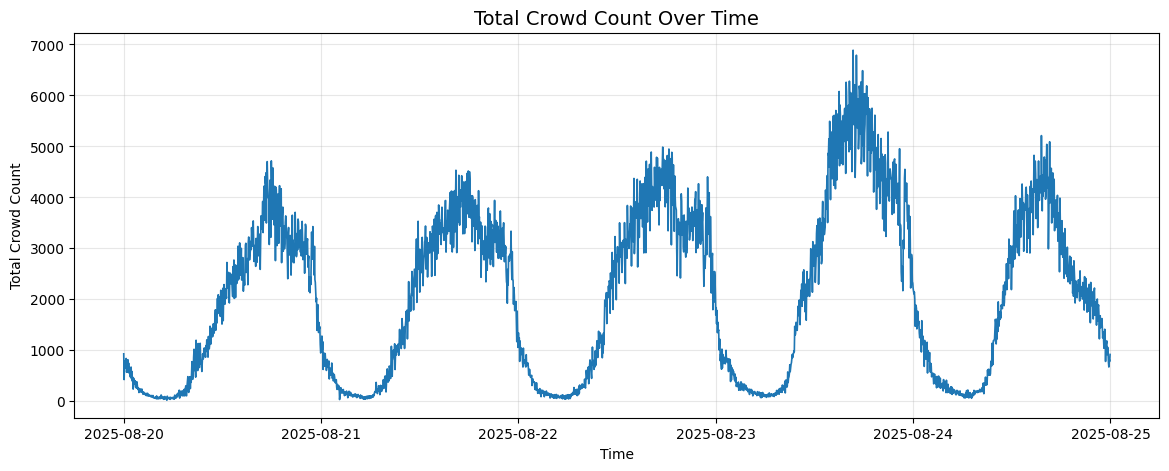

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.plot(df['timestamp'], df['total_crowd'], lw=1.2)
plt.title("Total Crowd Count Over Time", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Total Crowd Count")
plt.grid(alpha=0.3)
plt.show()

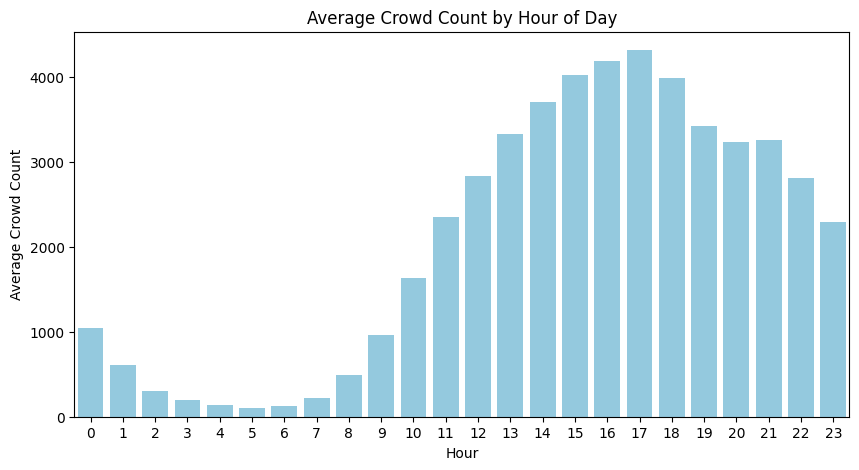

In [12]:
import seaborn as sns
hourly_avg = df.groupby('hour')['total_crowd'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=hourly_avg.index, y=hourly_avg.values, color="skyblue")
plt.title("Average Crowd Count by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Crowd Count")
plt.show()


/var/folders/r7/j4cx6h396gqdzk5s_4h9vf180000gn/T/ipykernel_50657/414375696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_avg.index, y=day_avg.values, palette="viridis")


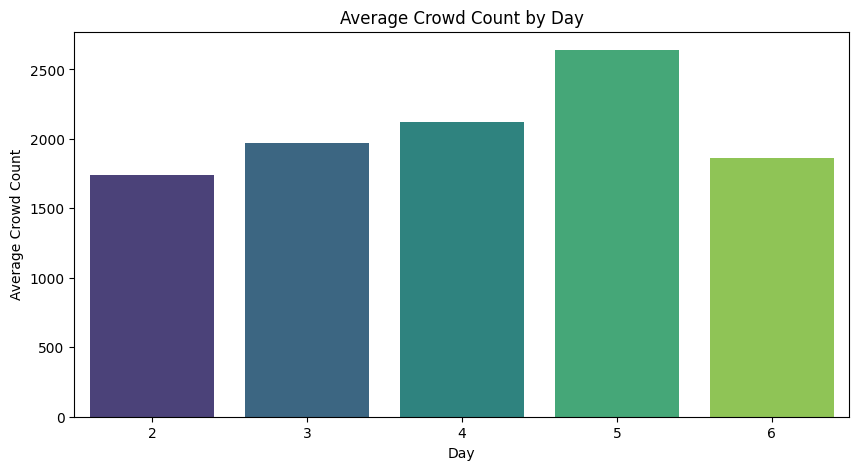

In [13]:
day_avg = df.groupby('weekday')['total_crowd'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=day_avg.index, y=day_avg.values, palette="viridis")
plt.title("Average Crowd Count by Day")
plt.xlabel("Day")
plt.ylabel("Average Crowd Count")
plt.show()


In [14]:
df

,timestamp,CMSA-GAKH-01_0,CMSA-GAKH-01_180,CMSA-GAWW-11_120,CMSA-GAWW-11_300,CMSA-GAWW-12_115,CMSA-GAWW-12_295,CMSA-GAWW-13_120,CMSA-GAWW-13_300,CMSA-GAWW-14_40,...,GVCV-13_190,GVCV-14_90,GVCV-14_270,hour,minute,day,month,weekday,is_weekend,total_crowd
0,2025-08-20 00:00:00+02:00,15,4,29,33,44,28,42,37,11,...,40,0,0,0,0,20,8,2,0,931
1,2025-08-20 00:03:00+02:00,1,3,21,29,34,39,9,14,6,...,0,0,0,0,3,20,8,2,0,426
2,2025-08-20 00:06:00+02:00,5,4,35,22,29,34,33,42,14,...,0,0,0,0,6,20,8,2,0,788
3,2025-08-20 00:09:00+02:00,4,4,40,47,42,40,19,34,15,...,0,0,0,0,9,20,8,2,0,646
4,2025-08-20 00:12:00+02:00,4,11,54,59,58,33,17,33,26,...,57,0,0,0,12,20,8,2,0,799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2025-08-24 23:45:00+02:00,11,9,38,44,51,51,6,19,18,...,12,0,0,23,45,24,8,6,1,767
2396,2025-08-24 23:48:00+02:00,2,1,46,42,30,45,34,33,8,...,6,23,6,23,48,24,8,6,1,672
2397,2025-08-24 23:51:00+02:00,10,2,51,26,42,59,21,30,22,...,0,0,8,23,51,24,8,6,1,824
2398,2025-08-24 23:54:00+02:00,3,1,24,36,42,32,12,55,9,...,0,2,8,23,54,24,8,6,1,780
